In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress

In [2]:
def straight_line(x, m, c): return m*x+c
def fit_line(xs, ys):
    popt = linregress(xs, ys)
    xFit = np.arange(min(xs), max(xs), 2e-4)
    label = f'For the best fit line (r-value = {popt.rvalue:.3f}):\nslope = ({popt.slope:.2e} ± {popt.stderr:.2e})' + f'\nintercept = ({popt.intercept:.2e} ± {popt.intercept_stderr:.2e})' 

    return xFit, straight_line(xFit, popt.slope, popt.intercept), (popt.slope, popt.intercept), (popt.stderr, popt.intercept_stderr), label

# Calibration

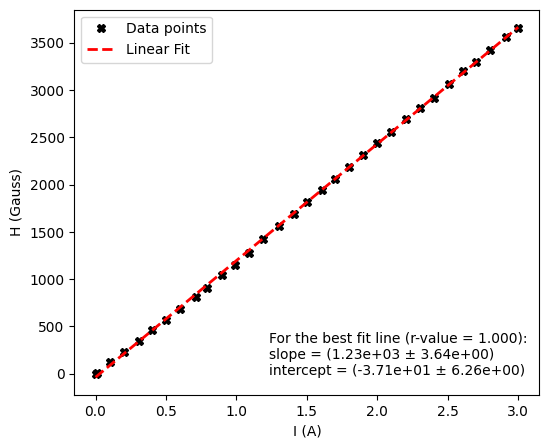

In [55]:
data = pd.read_excel('data.xlsx', sheet_name='calibration')
xx, yy, fit, error, label = fit_line(data['i'], data['b']*10)
plt.figure(figsize=(6,5))
plt.plot(data['i'], data['b']*10, 'kX', label='Data points')
plt.plot(xx,yy, 'r--', linewidth=2, label='Linear Fit')
plt.legend()
plt.ylabel('H (Gauss)')
plt.xlabel('I (A)')
plt.text(0.45,0.15,label, fontsize=10,transform=plt.gcf().transFigure)
m, c = fit
calibratedB = lambda i: (m*i) + c
# plt.savefig('images/cal.eps')

In [28]:
deltaH = np.sqrt((error[0]/fit[0])**2+(error[1]/fit[1])**2)
deltaH*1e-4

1.68747074748269e-05

# Germanium p-type

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Hall coefficient: 13003.31 \pm 82.955563 cm^3/C


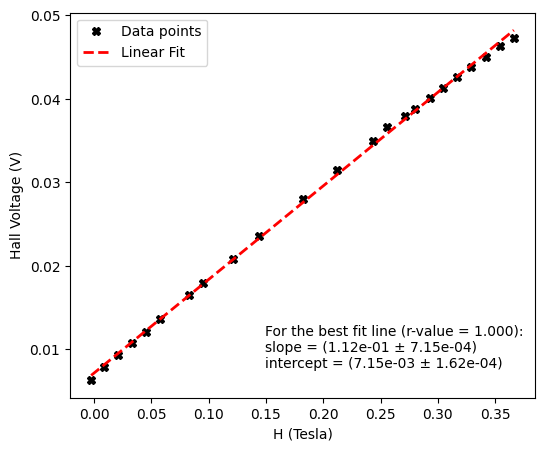

In [59]:
data1 = pd.read_excel('data.xlsx', sheet_name='geP')
b1 = calibratedB(data1['i'])*1e-4 # tesla
t1 = 0.5*1e-3 # mm
i1 = 4.31*1e-3 # mA
xx, yy, fit1, error1, label1 = fit_line(b1, data1['v']*1e-3)
plt.figure(figsize=(6,5))
plt.plot(b1, data1['v']*1e-3, 'kX', label='Data points')
plt.plot(xx,yy, 'r--', linewidth=2, label='Linear Fit')
plt.legend()
plt.xlabel('H (Tesla)')
plt.ylabel('Hall Voltage (V)')
plt.text(0.45,0.17,label1, fontsize=10,transform=plt.gcf().transFigure)
hc1 = fit1[0]*t1/i1*1e6
print(f'Hall coefficient: {hc1:.2f} \pm {hc1*error1[0]/fit1[0]:2f} cm^3/C')
# m, c = fit
plt.savefig('images/ge-p.eps')

# Germanium n-type

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Hall coefficient: -21542.86 \pm 62.623666 cm^3/C


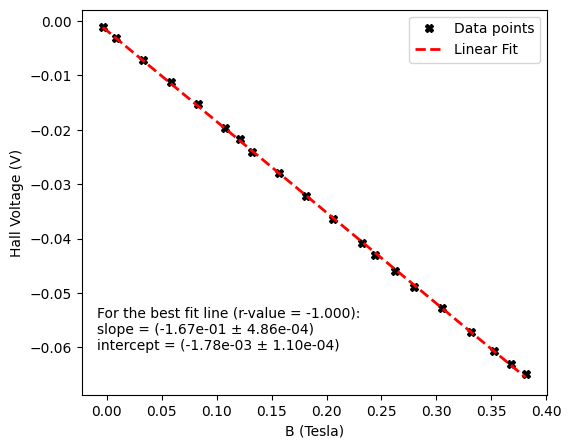

In [61]:
data2 = pd.read_excel('data.xlsx', sheet_name='geN')
b2 = calibratedB(data2['i'])*1e-4 # tesla
t2 = 0.5 # mm
i2 = 3.88 # mA
xx2, yy2, fit2, error2, label2 = fit_line(b2, -data2['v']*1e-3)
plt.figure(figsize=(6,5))
plt.plot(b2, -data2['v']*1e-3, 'kX', label='Data points')
plt.plot(xx2,yy2, 'r--', linewidth=2, label='Linear Fit')
plt.legend()
plt.xlabel('B (Tesla)')
plt.ylabel('Hall Voltage (V)')
plt.text(0.15,0.2,label2, fontsize=10,transform=plt.gcf().transFigure)
hc2 = fit2[0]*t2/i2*1e6
print(f'Hall coefficient: {hc2:.2f} \pm {hc2*error2[0]/fit2[0]:2f} cm^3/C')
# m, c = fit
plt.savefig('images/ge-n.eps')

# Silicon n-type

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Hall coefficient: -17913.59 \pm 178.352686 cm^3/C


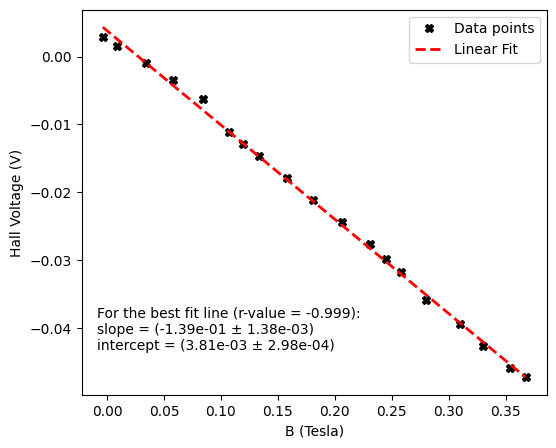

In [63]:
data3 = pd.read_excel('data.xlsx', sheet_name='siN')
b3 = calibratedB(data3['i'])*1e-4 # tesla
t3 = 0.5 # mm
i3 = 3.88 # mA
xx3, yy3, fit3, error3, label3 = fit_line(b3, -data3['v']*1e-3)
plt.figure(figsize=(6,5))
plt.plot(b3, -data3['v']*1e-3, 'kX', label='Data points')
plt.plot(xx3,yy3, 'r--', linewidth=2, label='Linear Fit')
plt.legend()
plt.xlabel('B (Tesla)')
plt.ylabel('Hall Voltage (V)')
plt.text(0.15,0.2,label3, fontsize=10,transform=plt.gcf().transFigure)
hc3 = fit3[0]*t3/i3*1e6
print(f'Hall coefficient: {hc3:.2f} \pm {hc3*error3[0]/fit3[0]:2f} cm^3/C')
plt.savefig('images/si-n.eps')

# Temperature variability of Hall Coefficient

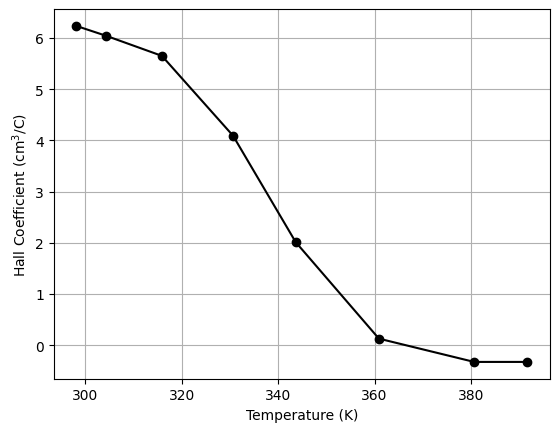

In [10]:
data4 = pd.read_excel('data.xlsx', sheet_name='temp')
# b3 = calibratedB(data3['i'])*1e-4 # tesla
# t3 = 0.5 # mm
# i3 = 3.88 # mA
# xx3, yy3, fit3, error3, label3 = fit_line(b3, -data3['v']*1e-3)
# plt.figure(figsize=(6,5))
plt.plot(data4['temperature']+273.15, data4['hall_coeff'], '-ko', label='Data points')
# plt.plot(xx3,yy3, 'r--', linewidth=2, label='Linear Fit')
# plt.legend()
plt.xlabel('Temperature (K)')
plt.ylabel(r'Hall Coefficient (cm$^3$/C)')
plt.grid()
# plt.text(0.15,0.2,label3, fontsize=10,transform=plt.gcf().transFigure)
# hc3 = fit3[0]*t3/i3*1e6
# print(f'Hall coefficient: {hc3:.2f} \pm {hc3*error3[0]/fit3[0]:2f} cm^3/C')
plt.savefig('images/temp.eps')
# data4

In [9]:
data = pd.read_excel('data.xlsx', sheet_name='calibration')
xx, yy, fit, error, label = fit_line(data['i'], data['b']*10)
m, c = fit
calibratedB = lambda i: (m*i) + c
calibratedB(0.81)

962.0318603834663